In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

print('hello world')

hello world


In [2]:
df_origin = pd.read_csv('open/train.csv')
df = pd.read_csv('open/train.csv')
print('Number of Data f``or training : {col}\n Number of Variables : {row}'
      .format(col = df.shape[0], row = df.shape[1]))

Number of Data f``or training : 1095
 Number of Variables : 13


In [3]:
df.loc[[611,612,613,614,615]]

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
611,2019-09-04,22.7,22.8,25.5,21.2,6.0,3.0,89.0,1.1,8.5,2.5,4.5,27168
612,2019-09-05,36.4,23.0,27.6,21.5,9.0,6.0,91.4,1.5,11.6,2.0,5.0,33929
613,2019-09-06,2.4,25.3,29.1,21.6,13.0,8.0,79.8,0.4,3.1,2.1,3.4,16631
614,2019-09-08,0.0,24.7,27.3,22.9,NaN,NaN,76.9,1.4,11.0,1.9,4.8,52055
615,2019-09-09,0.0,25.1,28.0,22.4,35.0,26.0,74.3,2.0,15.7,1.7,3.6,68370


In [4]:
# 2018.01.01 ~ 2020.12.31 (NaN of 2019.09.07 sat ;;;;;)
# 
new_row = pd.DataFrame(df.loc[[613]], columns = df.columns)

new_df = pd.concat([df.iloc[:613], new_row, df.iloc[613:]], ignore_index = True)

new_df.loc[614,'date'] = '2019-09-07' 


print(new_df.loc[[612,613,614,615]])
len(new_df)

           date  precipitation  temp_mean  temp_highest  temp_lowest  PM10  \
612  2019-09-05           36.4       23.0          27.6         21.5   9.0   
613  2019-09-06            2.4       25.3          29.1         21.6  13.0   
614  2019-09-07            2.4       25.3          29.1         21.6  13.0   
615  2019-09-08            0.0       24.7          27.3         22.9   NaN   

     PM2.5  humidity  sunshine_sum  sunshine_rate  wind_mean  wind_max  rental  
612    6.0      91.4           1.5           11.6        2.0       5.0   33929  
613    8.0      79.8           0.4            3.1        2.1       3.4   16631  
614    8.0      79.8           0.4            3.1        2.1       3.4   16631  
615    NaN      76.9           1.4           11.0        1.9       4.8   52055  


1096

In [5]:
# To distinguish weekend and weekday
# The name of new index is "days of week" 
# [0:Mon , 1:Tue, 2:Wen, 3:Thur, 4:Fri, 5:Sat, 6:Sun]

df_week = [] # List for df column "days of week"

L1 = new_df.shape[0] // 7  # 1096 // 7
L2 = new_df.shape[0] % 7  # 1096 // 7

week = [0, 1, 2, 3, 4, 5, 6]

for i in range(0,L1,1):
    df_week.extend(week)

for i in range(0,L2,1):
    df_week.append(i)

print(df_week)
print(len(df_week))

[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 

In [6]:
# Appended New Col "days of week"
new_df['days_of_week'] = df_week
new_df

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,days_of_week
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,0
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,1
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,3
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,6
1092,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,0
1093,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,1
1094,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2


In [7]:
new_df['test_set'] = np.zeros(new_df.shape[0]) # New column to distinguish test data and train data

test = new_df.sample(n = len(new_df)//5, replace = False)
test_list = test['test_set'].index # extraction test data
len(test_list) # The number of test data

test_list = list(test_list)
type(test_list)

print(test_list)

for i in test_list:
    new_df.loc[i, 'test_set'] = 1  # write 1 in 'test_set' for test data

[452, 74, 918, 125, 738, 788, 358, 586, 944, 368, 264, 468, 81, 608, 1019, 185, 441, 742, 537, 632, 459, 817, 685, 1062, 277, 774, 382, 629, 790, 646, 439, 283, 1005, 1061, 466, 181, 826, 325, 603, 305, 694, 512, 992, 488, 36, 562, 381, 241, 899, 776, 498, 823, 834, 418, 552, 420, 54, 707, 285, 760, 589, 177, 655, 991, 402, 429, 349, 298, 203, 671, 597, 338, 115, 83, 49, 376, 252, 434, 730, 143, 320, 473, 939, 663, 476, 442, 808, 394, 667, 101, 975, 594, 622, 265, 103, 959, 943, 854, 346, 727, 172, 696, 496, 419, 530, 665, 680, 1090, 710, 799, 846, 951, 942, 35, 987, 1072, 53, 217, 950, 11, 692, 853, 793, 911, 260, 815, 341, 529, 616, 257, 8, 515, 1092, 657, 750, 1000, 651, 600, 974, 687, 625, 649, 366, 390, 761, 902, 450, 270, 958, 46, 455, 375, 433, 890, 1056, 96, 809, 1029, 500, 294, 4, 1018, 670, 249, 136, 553, 970, 342, 1, 1035, 1077, 17, 624, 436, 786, 446, 668, 178, 709, 464, 1031, 999, 406, 526, 997, 106, 840, 623, 159, 206, 204, 957, 841, 501, 499, 405, 1089, 813, 314, 961, 63

In [8]:
test_df = new_df[new_df['test_set'] == 1] # test data
train_df = new_df[new_df['test_set'] == 0] # train data

test_df = test_df.drop(['test_set'], axis=1)
train_df = train_df.drop(['test_set'], axis=1)


print('num of test : ',test_df.shape[0])
print('num of train : ',train_df.shape[0])
print(test_df.shape[0] + train_df.shape[0])

num of test :  219
num of train :  877
1096


In [11]:
test_df

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,days_of_week
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,1
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,4
8,2018-01-09,0.5,-4.2,-1.2,-6.1,37.0,19.0,59.4,8.4,86.6,2.9,6.1,5988,1
11,2018-01-12,0.0,-10.2,-5.4,-15.3,21.0,14.0,35.4,8.8,89.8,1.7,3.6,4401,4
17,2018-01-18,0.0,2.1,4.5,0.3,80.0,56.0,59.6,NaN,0.0,1.9,3.8,7054,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2020-12-08,NaN,-0.5,4.1,-3.5,23.0,14.0,50.0,8.7,89.7,2.0,3.9,47614,1
1077,2020-12-13,2.9,-1.1,2.0,-6.0,36.0,25.0,74.9,1.1,11.5,2.9,6.1,14362,6
1089,2020-12-25,NaN,-0.8,3.5,-4.7,30.0,16.0,51.9,9.0,93.8,2.1,4.7,28600,4
1090,2020-12-26,NaN,2.2,8.0,-2.1,58.0,31.0,65.8,8.2,85.4,1.8,3.9,37137,5


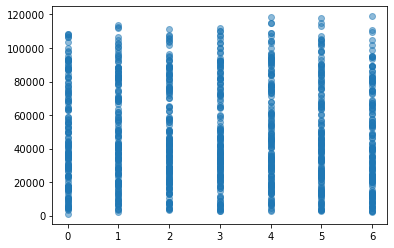

In [101]:
# X = df.precipitation.values
X = new_df.rental.values
Y = new_df.days_of_week.values

plt.scatter(Y,X, alpha=0.5)


Data Processing

In [8]:
new_df.isnull().sum() # Check Number of NaN

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
days of week       0
dtype: int64

In [74]:
df[['sunshine_rate', 'precipitation']] # I think It has very significant relation between sunshine_rate and precipitation

,sunshine_rate,precipitation
0,86.5,NaN
1,82.3,NaN
2,88.7,NaN
3,63.9,NaN
4,84.5,NaN
...,...,...
1090,61.5,0.0
1091,83.3,1.3
1092,0.0,0.2
1093,86.5,NaN


<AxesSubplot:>

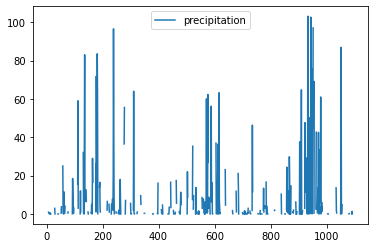

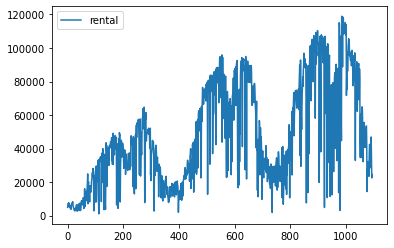

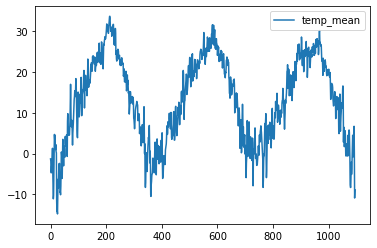

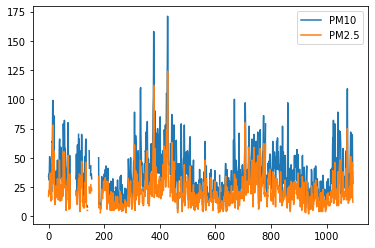

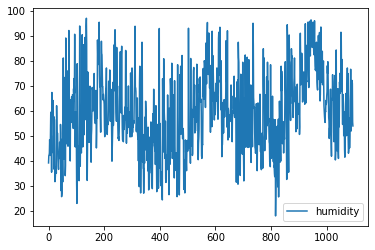

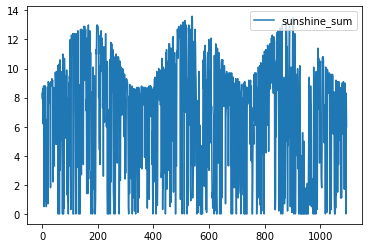

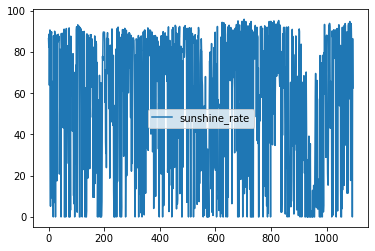

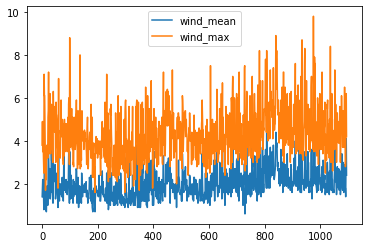

In [10]:
df.plot(y = 'precipitation')
df.plot(y='rental')
df.plot(y='temp_mean')
df.plot(y=['PM10','PM2.5'])
df.plot(y='humidity')
df.plot(y='sunshine_sum')
df.plot(y='sunshine_rate')
df.plot(y=['wind_mean','wind_max'])

<AxesSubplot:>

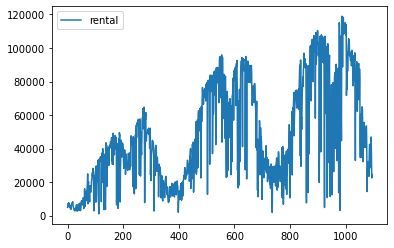

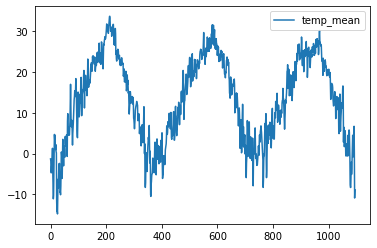

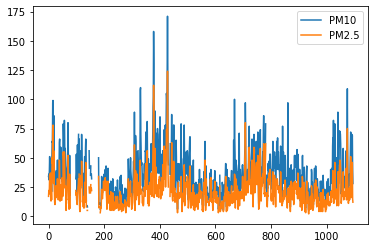

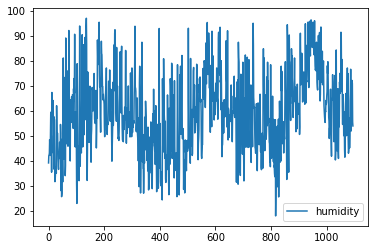

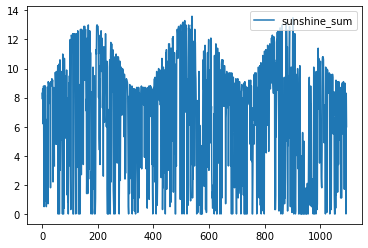

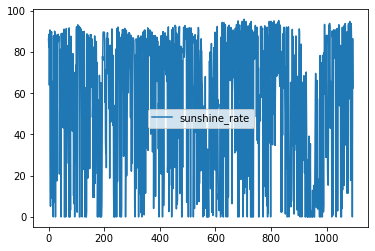

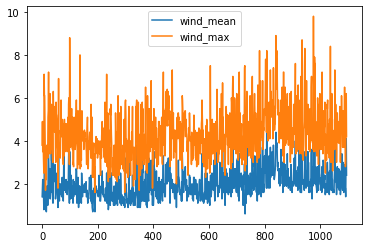

In [11]:
new_df.plot(y='rental')
new_df.plot(y='temp_mean')
new_df.plot(y=['PM10','PM2.5'])
new_df.plot(y='humidity')
new_df.plot(y='sunshine_sum')
new_df.plot(y='sunshine_rate')
new_df.plot(y=['wind_mean','wind_max'])